In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import texthero as hero

In [ ]:
import math
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# pd.set_option('display.max_colwidth', 100)
# pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_colwidth',500)

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df0 = pd.read_json('https://storage.googleapis.com/msca-bdp-data-open/news/news_final_project.json', orient='records', lines=True)

In [ ]:
df0.shape

(200119, 4)

In [ ]:
df0['language'].nunique()

1

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200119 entries, 0 to 200118
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      200119 non-null  datetime64[ns]
 1   language  200119 non-null  object        
 2   title     200119 non-null  object        
 3   text      200119 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.1+ MB


In [4]:
df0 = df0.drop('language',axis='columns')

In [ ]:
# # df_c = [df0['title'].apply(lambda x : any(pd.Series(x).str.lower().str.contains('chicago')))]
# mask = df0['title'].apply(lambda x: any(pd.Series(x).str.lower().str.contains('chicago')))
# df_c = df0.loc[mask]
# df_c_drop = df0.loc[~mask]
# df_c.shape,df_c_drop.shape

((141937, 4), (58182, 4))

# EDA

### word length

In [ ]:
df0['length'] = df0['text'].apply(len)

In [ ]:
# sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [ ]:
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("#3D372E")

In [ ]:
# sns.axes_style()

In [ ]:
plt.style.use('Solarize_Light2')

In [ ]:
import matplotlib as mpl
COLOR = 'white'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13)

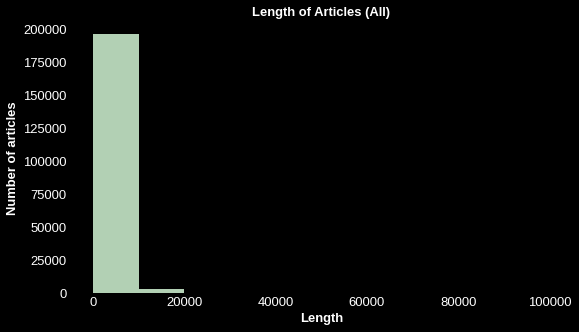

In [ ]:
# plt.figure(facecolor='#3D372E')

# plt.figure(figsize=(10,8))

plt.rcParams['figure.figsize'] = [9, 5]

plt.figure(facecolor='black')

ax = plt.axes()
ax.set_facecolor("black")
plt.ylabel("Number of articles", fontweight='bold',fontsize=13)
plt.xlabel("Length", fontweight='bold',fontsize=13)
plt.title("Length of Articles (All)", fontweight='bold',fontsize=13)


df0['length'].hist(color ='#B2D0B4')
plt.grid(False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


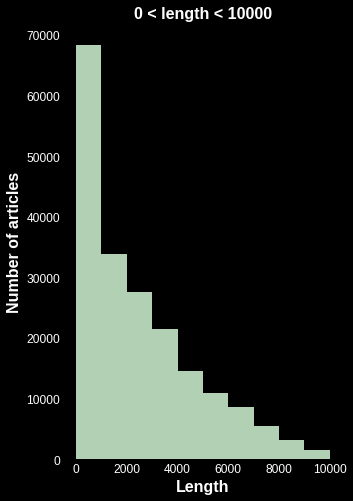

In [ ]:
# plt.figure(figsize=(4,3)) 
plt.figure(facecolor='black')
plt.rcParams['figure.figsize'] = [5, 8]
plt.ylabel("Number of articles", fontweight='bold',fontsize=16)
plt.xlabel("Length", fontweight='bold',fontsize=16)
plt.title("0 < length < 10000", fontweight='bold',fontsize=16)

ax = plt.axes()
ax.set_facecolor("black")

df0[df0['length'] < 10000]['length'].hist(color ='#B2D0B4')
plt.grid(b=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


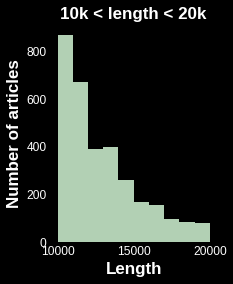

In [ ]:
plt.figure(facecolor='black')
plt.rcParams['figure.figsize'] = [3, 4]
plt.ylabel("Number of articles", fontweight='bold',fontsize=17)
plt.xlabel("Length", fontweight='bold',fontsize=17)
plt.title("10k < length < 20k", fontweight='bold',fontsize=17)

ax = plt.axes()
ax.set_facecolor("black")

df0[(df0['length'] > 10000) & (df0['length'] < 20000)]['length'].hist(color ='#B2D0B4')
plt.grid(None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 576x432 with 0 Axes>

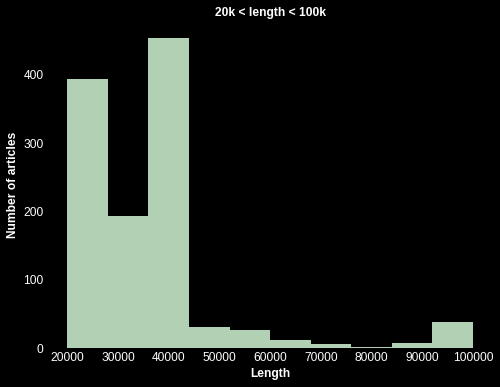

In [ ]:

plt.figure(figsize=(8,6)) 
plt.figure(facecolor='black')


plt.ylabel("Number of articles", fontweight='bold',fontsize=12)
plt.xlabel("Length", fontweight='bold',fontsize=12)
plt.title("20k < length < 100k", fontweight='bold',fontsize=12)

ax = plt.axes()
ax.set_facecolor("black")

df0[df0['length'] > 20000]['length'].hist(color ='#B2D0B4')
plt.grid(None)

### token count

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
df0.head(3)

,date,title,text,count,length
0,2022-01-06,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,1066,5899
1,2022-01-06,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,1086,5995
2,2022-01-06,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,52,287


In [8]:
dfx = df0.head(10)

In [16]:
from collections import Counter

def token_count(text):
  results = Counter()
  text.lower().split().apply(results.update)
  print(results)

  return results

In [31]:
from nltk.tokenize import word_tokenize

def token_count(text):
  lst_len = len(word_tokenize(text))
  # print(lst_len)

  return lst_len

In [32]:
# dfx['count'] = dfx['text'].apply(lambda x: token_count(x))

df0['count']  = ""
for idx, row in df0.iterrows():
  df0.loc[idx,'count'] = token_count(row['text'])


In [33]:
df0['count'].sum()

107519782

In [34]:
df0['length'] = df0['text'].apply(len)